# Tampa Real-Estate Recommender
## Exploratory Data Analysis
TB Real Estate Corporation is a real estate investment firm in the Tampa Bay, Florida area.  The real estate market in the Tampa Bay area is very active.  Single family homes are selling quickly.  TB Real Estate Corporation needs to be able to assess the value of homes coming onto the market quickly and accurately so that they can beat the competition in making a competitive offer.   They need to be able to evaluate the listing price against the predicted sale price in order to identify properties that may be priced below market value and would make good investments.  
<br>
The objective of the EDA is to identify which features are the best predictors of sales price for residential properties.

# 1 Imports and File Locations<a id='1'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# suppress future warnings
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)

In [3]:
ext_data = '../data/external/'
raw_data = '../data/raw/'
interim_data = '../data/interim/'
report_figures = '../reports/figures/'

# 2 Read Sales data into dataframe<a id='2'></a>

In [4]:
df = pd.read_csv(interim_data + 'sales_df.csv')
df.head()

C:\Users\mkars\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (26,27,28,38) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,FOLIO,DOR_CODE,S_DATE,VI,QU,REA_CD,S_AMT,S_TYPE,ORIG_SALES_DATE,SITE_ADDR,...,BASE,ACREAGE,NBHC,MUNICIPALITY_CD,SECTION_CD,TOWNSHIP_CD,RANGE_CD,LAND_TYPE_ID,BLOCK_NUM,LOT_NUM
0,80100,100,1987-08-01,I,Q,01,50000.0,WD,1985-11-01,19859 ANGEL LN,...,2016,5.058780,211007.0,U,1,27,17,001,000000,00001.1
1,80100,100,1985-11-01,V,Q,01,24000.0,WD,1985-11-01,19859 ANGEL LN,...,2016,5.058780,211007.0,U,1,27,17,001,000000,00001.1
2,90100,100,2021-10-27,I,Q,01,750000.0,WD,1973-01-01,19913 ANGEL LN,...,1973,4.438490,211007.0,U,1,27,17,001,000000,00002.1
3,90100,100,1997-05-01,I,Q,01,169900.0,WD,1973-01-01,19913 ANGEL LN,...,1973,4.438490,211007.0,U,1,27,17,001,000000,00002.1
4,100000,100,1988-06-01,I,Q,01,52500.0,WD,1977-12-01,6934 W COUNTY LINE RD,...,1994,0.992559,211007.0,U,1,27,17,001,000000,00003.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847102 entries, 0 to 847101
Data columns (total 39 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   FOLIO            847102 non-null  int64  
 1   DOR_CODE         847102 non-null  int64  
 2   S_DATE           847102 non-null  object 
 3   VI               847102 non-null  object 
 4   QU               847102 non-null  object 
 5   REA_CD           847102 non-null  object 
 6   S_AMT            847102 non-null  float64
 7   S_TYPE           847102 non-null  object 
 8   ORIG_SALES_DATE  847102 non-null  object 
 9   SITE_ADDR        847013 non-null  object 
 10  SITE_CITY        847095 non-null  object 
 11  SITE_ZIP         847102 non-null  object 
 12  tBEDS            847102 non-null  float64
 13  tBATHS           847102 non-null  float64
 14  tSTORIES         847102 non-null  float64
 15  tUNITS           847102 non-null  float64
 16  tBLDGS           847102 non-null  floa

## Home Types and Features

**DOR Code** is the Department of Revenue Code which indicates the type of property (i.e. single family home, condo, commercial, etc.)  The data has already been filtered for the following residential property types.
- 0100: Single Family Residential
- 0102: Single family home built around a mobile home
- 0106: Townhouse/Villa
- 0200: Mobile Home
- 0400: Condominium
- 0408: Mobile Home Condominium
- 0800: Multi-Family Residential (Duplex, Triplex, Quadplex, etc.) < 10 units
- 0801: Multi-Family Residential (units individually owned)
- 0802: Multi-Family Residential (units rentals)

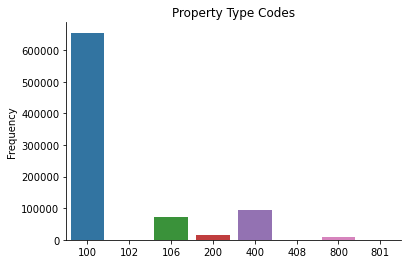

In [6]:
sns.countplot(data=df, x='DOR_CODE')
plt.xlabel('')
plt.ylabel('Frequency')
plt.title('Property Type Codes')
sns.despine()
plt.show()

Most of the property sales are Single Family Residential (code 100).  Condominiums (400) and Townhouses (106) are the next highest categories, but they are just a small fraction of the total sales.  
<br>
TB Real Estate Corp will focus on Single Family Residential homes as Condominiums and Townhouses have more investment complications such as association fees and rules restricting sales and rentals.

In [7]:
df = df[df['DOR_CODE'] == 100]
df.drop('DOR_CODE', axis=1, inplace=True)

**# of Beds/Baths**: The number of bedrooms and bathrooms are important features for home sales. 
<br>
TB Real Estate Corp is focused on investing in residential homes with 3-5 bedrooms and 1-4 bathrooms.  Anything less or more would not be appealing to most home buyers. 

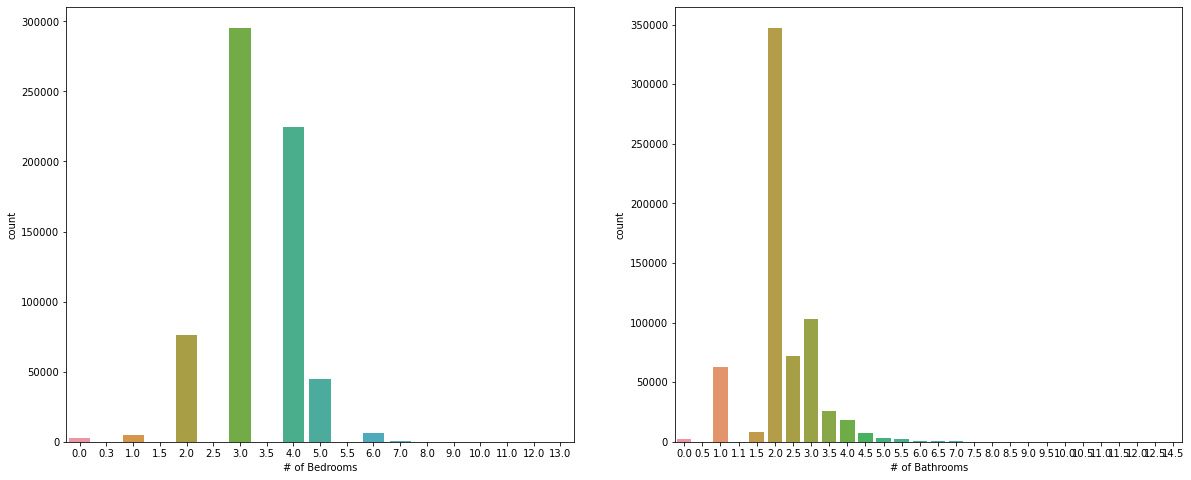

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
sns.countplot(df['tBEDS'], ax=ax1)
sns.countplot(df['tBATHS'],ax=ax2)
ax1.set(xlabel='# of Bedrooms', ylabel='count')
ax2.set(xlabel='# of Bathrooms', ylabel='count')
plt.show()

In [9]:
df = df[(df['tBEDS'] >= 3) & (df['tBEDS'] <= 5)]
df = df[(df['tBATHS'] >= 1) & (df['tBATHS'] <= 4)]

**# of Buildings/Stories/Units**: Most homes have just 1 building structure, 1 unit and 1 or 2 stories.  However, there are a few outliers that have more.  

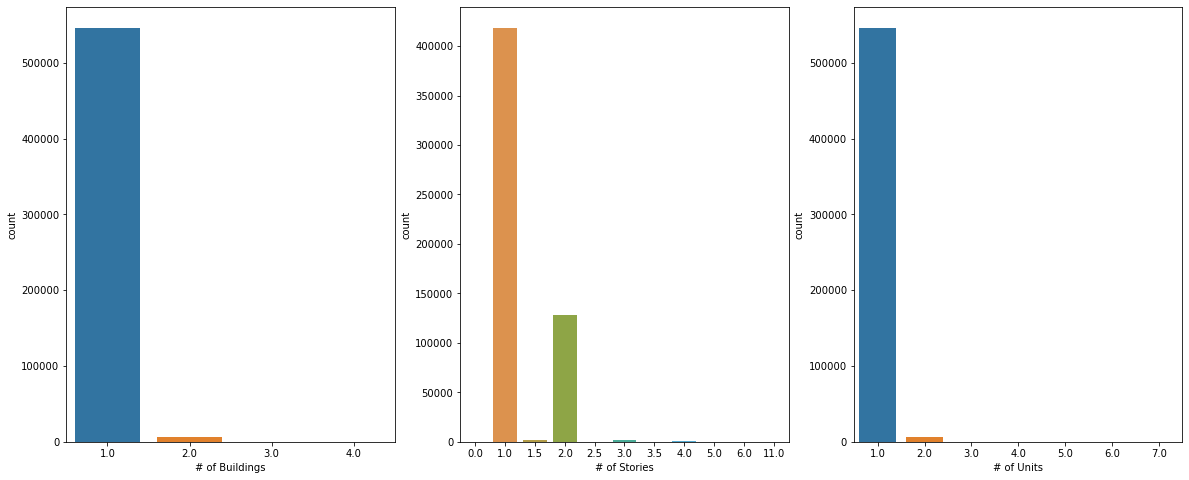

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,8))
sns.countplot(df['tBLDGS'], ax=ax1)
sns.countplot(df['tSTORIES'],ax=ax2)
sns.countplot(df['tUNITS'],ax=ax3)
ax1.set(xlabel='# of Buildings', ylabel='count')
ax2.set(xlabel='# of Stories', ylabel='count')
ax3.set(xlabel='# of Units', ylabel='count')
plt.show()

**Age of Home**: The age of the home may have an impact on the sales price.  Old homes could require more investment in maintenance and repairs than newer homes.  Calculate age of home (AGE) based on Actual Year Built (ACT).  Drop actual year built as well as the effective year (EFF) which is used to calculate depreciation.  Drop base year (BASE) which is used to calculate property tax based on when the homestead tax exemption was approved.

In [11]:
df['AGE'] = datetime.today().year - df['ACT']
df.drop(['ACT', 'EFF', 'BASE'], axis=1, inplace=True)

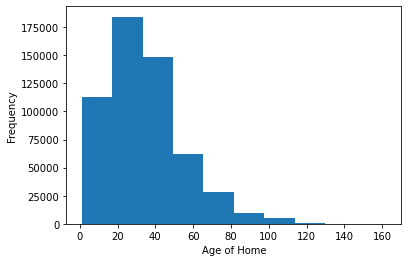

count    552358.000000
mean         33.958492
std          20.767280
min           1.000000
25%          19.000000
50%          31.000000
75%          44.000000
max         162.000000
Name: AGE, dtype: float64

In [12]:
plt.hist(df['AGE'])
plt.xlabel('Age of Home')
plt.ylabel('Frequency')
plt.show()
df['AGE'].describe()

**Heated Area**: The heated area is the square footage of the home that is heated.  This is equivalent to the size of the home and is an important factor in home sales.  Most single family residential homes are between 1500 and 2500 square feet.

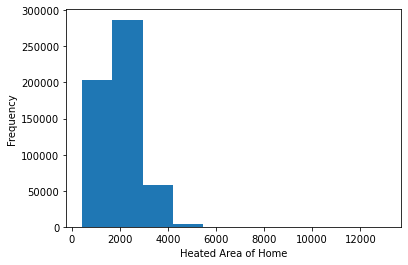

count    552358.000000
mean       2032.920812
std         705.048338
min         420.000000
25%        1504.000000
50%        1898.000000
75%        2430.000000
max       13065.000000
Name: HEAT_AR, dtype: float64

In [13]:
plt.hist(df['HEAT_AR'])
plt.xlabel('Heated Area of Home')
plt.ylabel('Frequency')
plt.show()
df['HEAT_AR'].describe()

**Acreage**: The acreage is the size of the land and is an important factor in home sales.  Most properties are between 0.15 and 0.28 acres.

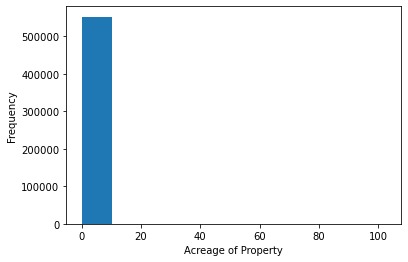

count    552358.000000
mean          0.312408
std           0.682845
min           0.032481
25%           0.148666
50%           0.193132
75%           0.281089
max         102.646000
Name: ACREAGE, dtype: float64

In [14]:
plt.hist(df['ACREAGE'])
plt.xlabel('Acreage of Property')
plt.ylabel('Frequency')
plt.show()
df['ACREAGE'].describe()

## Location, Location, Location!! 
Location is a very important factor when evaluating market value of homes.  The following fields provide information about the location of the property.
- SITE_ADDR - Street Number and Name
- SITE_CITY - City Name
- SITE_ZIP - Postal Zip Code
- MUNICIPALITY_CD - "A"=Tampa, "T"=Temple Terrace, "P"=Plant City, "U"=Unincorporated
- TOWNSHIP_CD - Values 27-32 indicating the latitudinal rows on the grid map below.
- RANGE_CD - Values 17-22 indicating the longitudinal columns on the grid map below.
- SECTION_CD - Values 1-36 represented by the 6x6 sections of red squares within each Township/Range on the grid map below.
- LAND_TYPE_ID - Identifies the type of land. All platted Subdivisions have been assigned an ID number. For all unplatted, "ZZZ" has been assigned. 
- BLOCK_NUM - 6 digit code for the Block Number in platted Subdivisions. For unplatted land, the BLOCK# will carry a uniquely assigned number.
- LOT_NUM - 6 digit code for the Lot Numbers in Platted Subdivisions. For all unplatted land, the LOT# will carry a uniquely assigned number. 
- NBHC - 6 digit code for the Neighborhood as displayed in the colored areas on the grid map below.
- Market Area - Values 1-29 for the Market Area used for assessing values for tax purposes.  The Market Area is represented by the bold black division lines and large purple numbers in the grid map below.

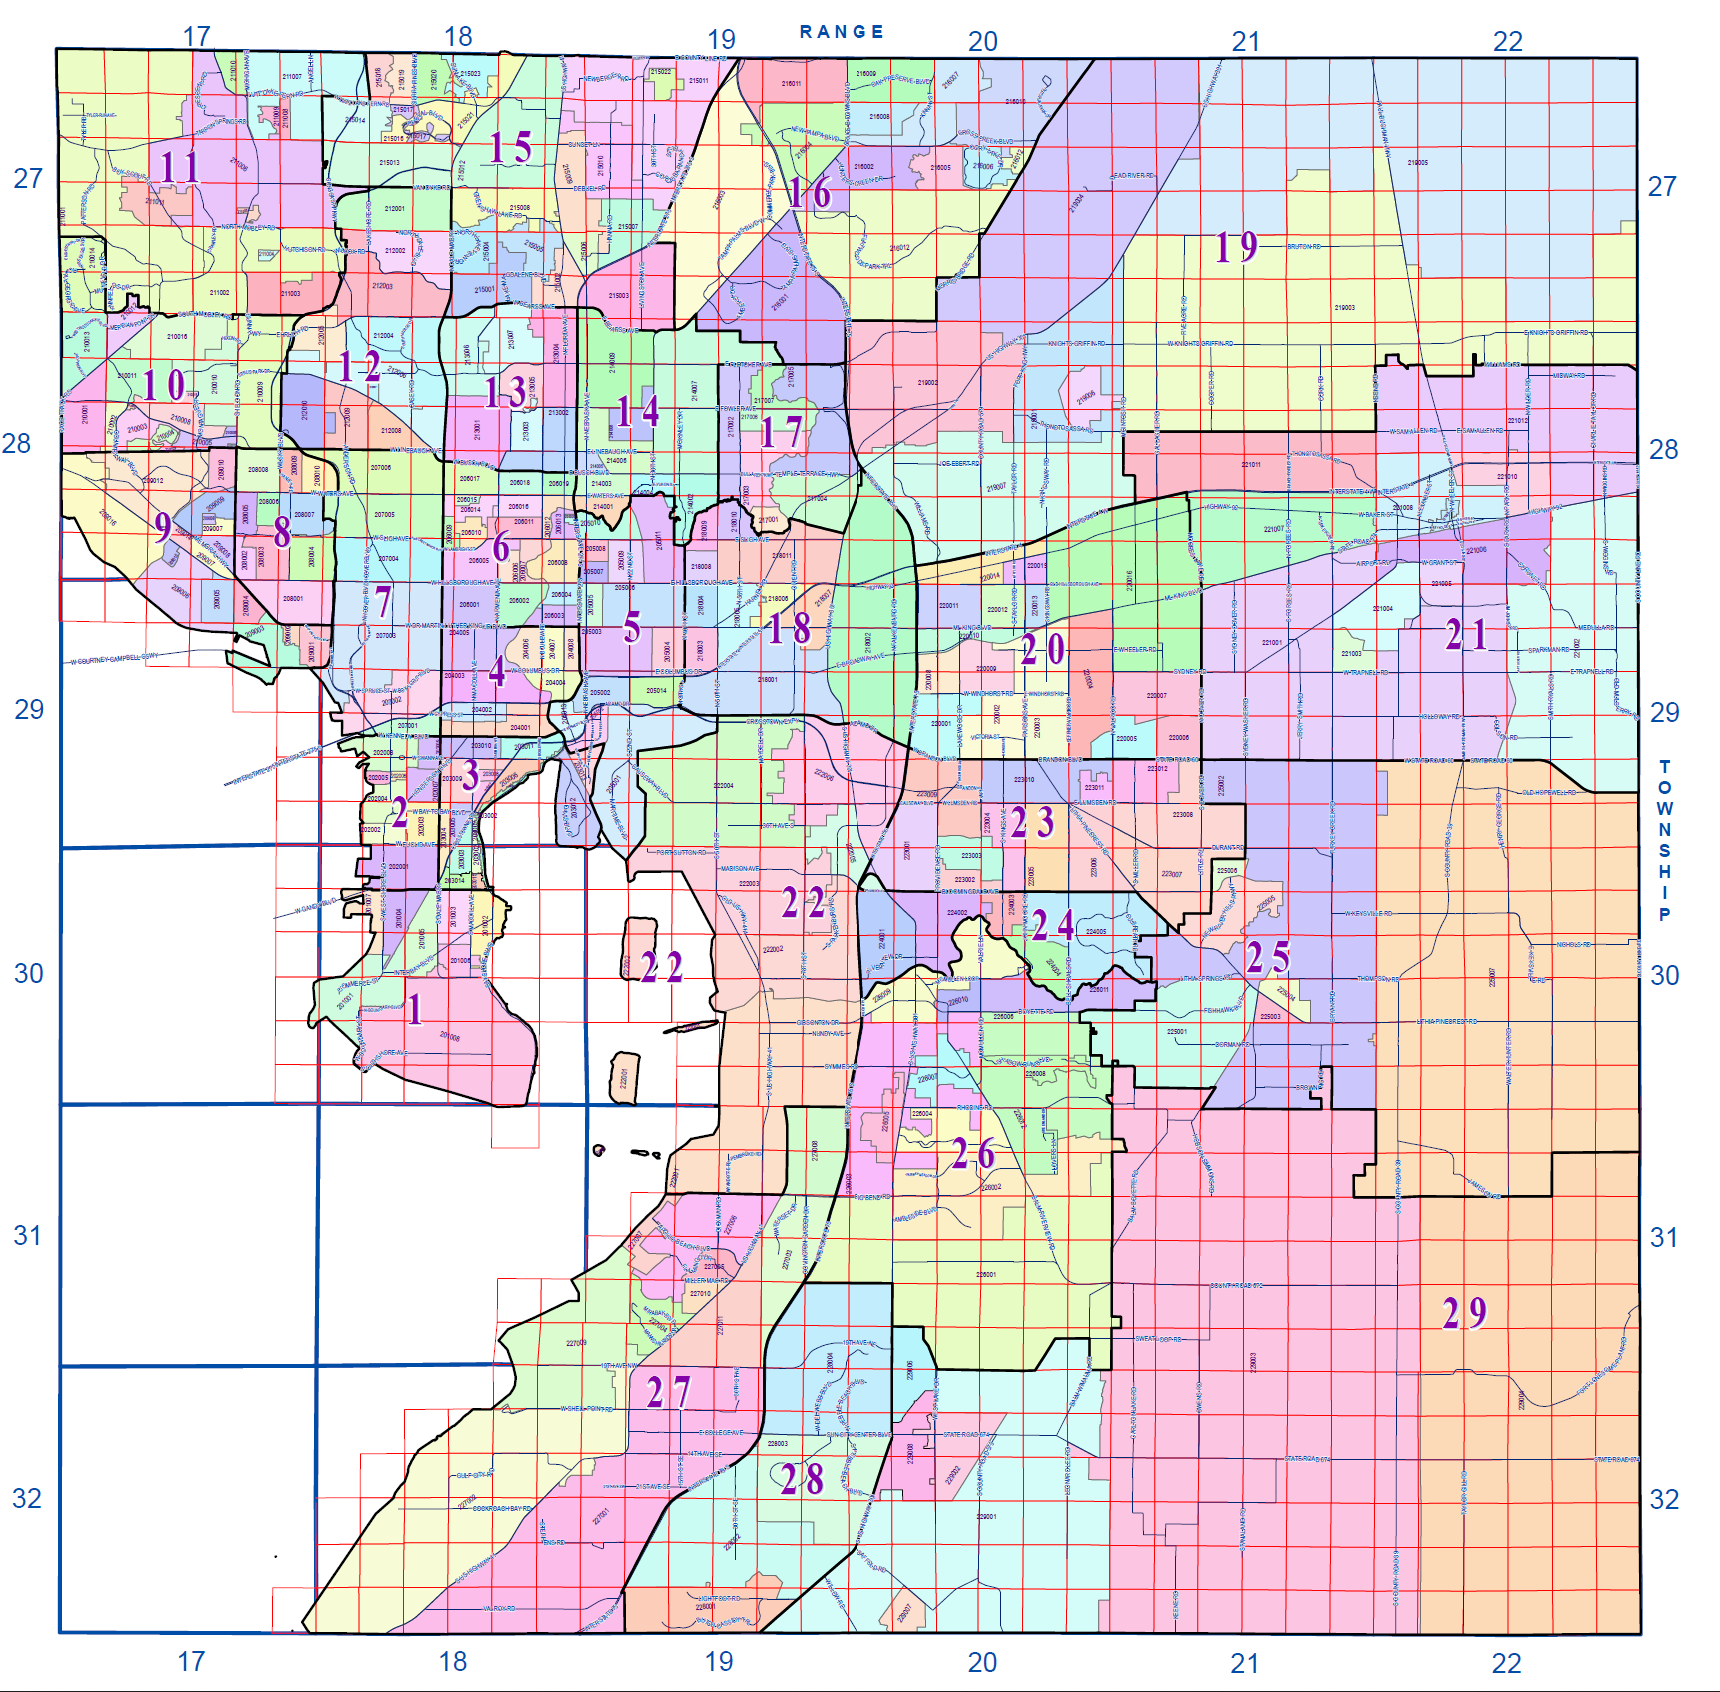

In [23]:
# The Market Area Code can be extracted from the second and third digits of the Neighborhood Code.
df['MARKET_AREA_CD'] = df['NBHC'].astype(str).str[1:3].astype(int)

The **SITE_ADDR** is the unique house number and street name for the property in the city.  The **BLOCK_NUM** and **LOT_NUM** are numeric representations of the street address.
<br>
The **SITE_CITY** is the city or town where the property is located.  
Therefore the SITE_ADDR and SITE_CITY can be dropped.

In [ ]:
df.drop(['ACT', 'EFF', 'BASE'], axis=1, inplace=True)

In [21]:
df['SECTION_CD'].value_counts()

5     21534
17    20868
32    20246
33    19832
12    18669
7     18151
6     18098
36    17504
20    17143
10    16813
4     16807
8     16561
9     16017
16    15810
15    15636
13    15488
18    15410
25    15311
35    15133
21    15119
27    14906
28    14644
29    14590
11    14370
3     14252
1     14213
2     14201
26    13957
14    13602
22    13584
30    12292
23    11800
31    11150
24    11095
34    10048
19     7504
Name: SECTION_CD, dtype: int64

In [36]:
df[(df['TOWNSHIP_CD'] == 32) & (df['RANGE_CD'] == 18)].groupby(['SECTION_CD']).size()

SECTION_CD
1     1222
2       84
10      65
11      92
12     195
13      23
14      13
15      29
23       7
24      11
dtype: int64

In [19]:
df['SECTION_CD'].describe()

count    552358.000000
mean         18.055471
std          10.493813
min           1.000000
25%           9.000000
50%          17.000000
75%          27.000000
max          36.000000
Name: SECTION_CD, dtype: float64

## Target Feature - Sales Price (S_AMT)

**S_AMT** is the sale price of the property.  This will be the target feature to predict.

In [ ]:
print(sales_df['S_AMT'].describe().apply(lambda x: format(x, 'f')))

In [ ]:
S_AMT_mean = sales_df['S_AMT'].mean()
S_AMT_std = sales_df['S_AMT'].std()
_ = plt.subplots(figsize=(15, 5))
_ = plt.hist(data=sales_df, x='S_AMT', bins=[0, 100000, 200000, 300000, 400000, 500000, 1000000])
_ = plt.xlabel('Sales Amount')
_ = plt.ylabel('count')
_ = plt.title('Distribution of Property Sale Amounts')
_ = plt.ticklabel_format(useOffset=False, style='plain')
_ = plt.axvline(S_AMT_mean, color='r')
_ = plt.axvline(S_AMT_mean+S_AMT_std, color='r', linestyle='--')
_ = plt.axvline(S_AMT_mean+(2*S_AMT_std), color='r', linestyle='-.')

## Sales Date

**S_DATE** is the date of the sale.  Property sales increased sharply from the mid-1990's to the mid-2000's when the U.S. mortgage crisis crashed the housing market.  Over the 2010's the annual number of property sales increased to near the levels prior to the crash.  

In [ ]:
sales_df['S_DATE'] = pd.to_datetime(sales_df['S_DATE'])

In [ ]:
plt.subplots(figsize=(15, 5))
sns.countplot(x=sales_df['S_DATE'].dt.year)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(rotation = 90)
plt.title('Residential Property Sale Counts by Year')
sns.despine()
plt.show()

In [ ]:
plt.subplots(figsize=(15, 5))
sales_df.groupby(sales_df['S_DATE'].dt.year)['S_AMT'].mean().plot()
plt.xlabel('Year')
plt.ylabel('Avg Sale Price')
plt.title('Avg Sale Price per Year for Residential Homes')
plt.show()

Sales data prior to 2021 is excluded as market conditions such as the mid-2000's real-estate crisis can influence price.  In order to predict current market values, we will focus on the most current year of sales data.

In [ ]:
df = sales_df[sales_df['S_DATE'] >= '2021-01-01']

In [ ]:
plt.subplots(figsize=(15, 5))
df.groupby(df['S_DATE'].dt.to_period('M'))['S_AMT'].mean().plot()
plt.xlabel('Month')
plt.ylabel('Avg Sale Price')
plt.title('Avg Sale Price for Residential Homes since 2021')
plt.show()

## Drop Unnecessary Data

**FOLIO** is a unique identifier for a property.  It will not impact the sales price and can be dropped from the analysis.

In [ ]:
df['FOLIO'].astype(str).describe()

In [ ]:
df.drop('FOLIO', axis=1, inplace=True)

## Correlation

In [ ]:
plt.subplots(figsize=(12,10))
sns.heatmap(df.corr());

In [ ]:
sns.boxplot(data=df,
            x='DOR_CODE',
            y='S_AMT')
plt.xlabel('Property Type Code')
plt.ylabel('Sales Price')
sns.despine()
# plt.ticklabel_format(useOffset=False, style='plain')
plt.show()